Num examples 10


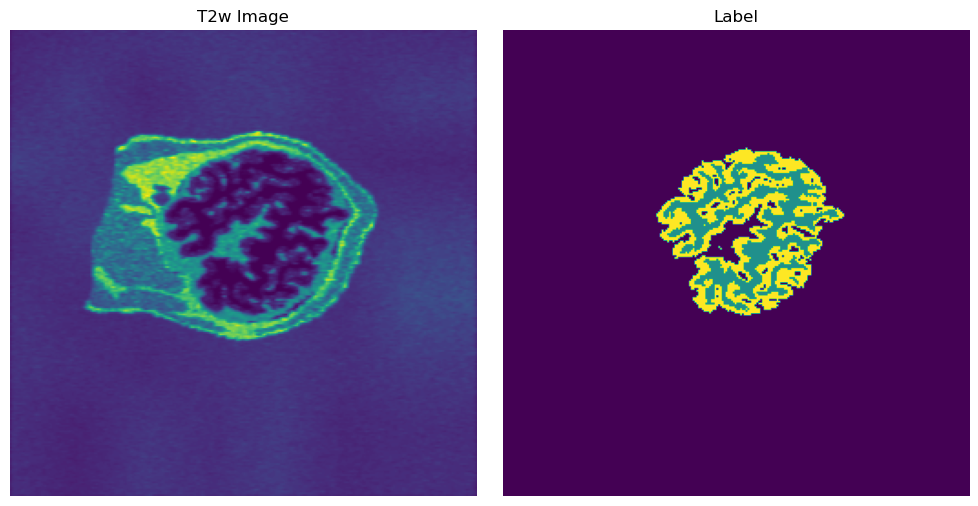

In [22]:
import torch
import numpy as np
import sys
sys.path.append('/data/users1/mdoan4/babywire/gen_scripts/wirehead')
import matplotlib.pyplot as plt
from wirehead.mongoloader import MongoheadDataset, mtransform
from pymongo import MongoClient


MONGOHOST = "10.245.12.58"
DBNAME = "babywire_test"
COLLECTION = "read"

INDEX_ID = "id"

volume_shape = [256] * 3
subvolume_shape = [256] * 3

def create_client_fn(x):
    return create_client(x, dbname=DBNAME, colname=COLLECTION, mongohost=MONGOHOST)

def mycollate_full(x):
    return x

def mytransform(x):
    return mtransform(x)

def identity(x):
    return x

client = MongoClient("mongodb://" + MONGOHOST + ":27017")
db = client[DBNAME]
posts = db[COLLECTION]

last_post = posts['bin'].find_one(sort=[(INDEX_ID, -1)])

if last_post is None:
    print("No documents found in the collection, exiting")
    exit()

num_examples = int(last_post[INDEX_ID] + 1)
print("Num examples " + str(num_examples))

dataset = MongoheadDataset(
    indices=range(num_examples),
    transform=mytransform,
    collection=posts,
    id=INDEX_ID,
    normalize=identity,
    sample=("data", "label"),
)

# Get a single sample
print(dataset)
id = 1
idx = [id]  # Change this to the desired sample index
data = dataset[idx]
sample, label = data[id]['input'], data[id]['label']
# Plot the sample using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

slice = 175
ax1.imshow(sample[slice, :, :])
ax1.set_title('T2w Image')
ax1.axis('off')

ax2.imshow(label[slice, :, :])
ax2.set_title('Label')
ax2.axis('off')

plt.tight_layout()
plt.show()